** Plotting a Randome Plot **

In [6]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [25]:
x = np.random.randint(0, 30, 10)
y = np.random.randint(0, 55, 10)

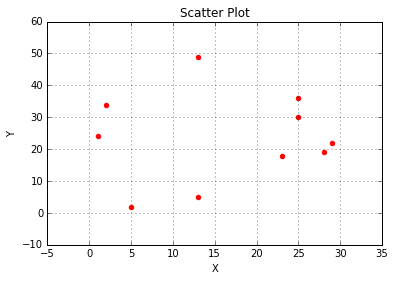

In [32]:
plt.figure()
plt.title("Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x,y, color='red')
plt.grid(True, color='0')
plt.autoscale(True)
plt.show()